# **Homework 5**
Josh Winnes

October 29, 2024

***Specifications***

- download the voice features

- run clustering on the voice clips, using only the voice features, do not include the demographic features of the clips

- using the elbow method to find the most suitable k for k-means clustering

- explore using different subsets of the voice features for clustering and observe the differences

- try different clustering methods

***Deliverables***
- self contained python jupyter notebook that implements the specifications. 

***Planning for unit project***

start to think about a project you would like to do, the overarching theme of the project is to conduct predictive analytics on voice data, for instance, to design and implement a “speaker attribute classifier”: given a speaker’s voice recordings, “predict” the speaker attributes. Potential attributes to consider include: accents, speaking rate. 


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio
import librosa
import librosa.display
import scipy

import os

data_dir = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/voice_clip_selected/'
os.chdir(data_dir)
voice_clip_meta_data = pd.read_csv("voice_feature_20241022.csv")

### Code to prep data file

In [10]:
voice_clip_meta_data.head()

,f0_mean,f0_std,f0_var,f0_min,f0_max,f0_skew,f0_kurtosis,zcr_mean,zcr_std,zcr_var,...,sentence_id,sentence,up_votes,down_votes,age,gender,accents,len_in_second,sampling_rate,array_size
0,148.104476,28.297353,800.740162,98.851402,244.810709,0.944129,1.336574,0.054803,0.047640,0.002270,...,1ecd9b2843ef0da42b512aad498414714c86d3cadb2910...,"Sheila was cremated, and the casket with her a...",2,0,seventies,female_feminine,NaN,9.048,48000,434304
1,179.445817,58.340342,3403.595457,108.422687,352.266349,1.689793,2.507009,0.078192,0.056876,0.003235,...,1e8739c456e984b8d86652c0275a34826597063896e98b...,"From each heat, the entrants are whittled down...",2,0,seventies,female_feminine,NaN,5.472,48000,262656
2,164.328685,31.545504,995.118832,120.999409,270.069989,1.420956,2.301650,0.081051,0.060591,0.003671,...,1ef6553bf88ea2751ceeadd7e993246f073fc9587ad762...,"A cemetery encircles the square, leading to th...",2,0,seventies,female_feminine,NaN,7.128,48000,342144
3,189.950775,43.507088,1892.866742,127.456063,377.549725,2.154458,6.023298,0.095945,0.070520,0.004973,...,1f1340137eb2937a87b7f2ea5306f56a04a2eaf6091ab8...,The village is also significant for its well-p...,2,0,seventies,female_feminine,NaN,5.712,48000,274176
4,151.709046,24.508886,600.685503,100.579294,250.532888,1.246426,2.390260,0.059913,0.065133,0.004242,...,82ad00fd14a2eeec195d03a6ad1c7e466d0f061317881f...,Myers is faculty member at the Perimeter Insti...,2,0,seventies,male_masculine,England English,8.460,32000,270720


### Using K-Means Clustering to Classify Voice Files

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

def find_elbow(df, colnames, clusters_range):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    inertias = [] # wcss: Within Cluster Sum of Squares
    for k in clusters_range:
        kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
        inertias.append(kmeans.inertia_)
    plt.figure()
    plt.plot(clusters_range,inertias, marker='o')
    plt.title('Elbow method for deciding on k')
    plt.xlabel('Number of clusters: k')
    plt.ylabel('inertia')
    plt.show()
    return

def run_kmeans(df, colnames, k):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
    df['cluster'] = kmeans.labels_
    return df

In [15]:
voice_clip_meta_data.isna().sum()

f0_mean            15
f0_std             15
f0_var             15
f0_min             15
f0_max             15
f0_skew            16
f0_kurtosis        16
zcr_mean            0
zcr_std             0
zcr_var             0
zcr_min             0
zcr_max             0
zcr_skew            0
zcr_kurtosis        0
mfcc_00             0
mfcc_01             0
mfcc_02             0
mfcc_03             0
mfcc_04             0
mfcc_05             0
mfcc_06             0
mfcc_07             0
mfcc_08             0
mfcc_09             0
mfcc_10             0
mfcc_11             0
mfcc_12             0
mfcc_13             0
mfcc_14             0
mfcc_15             0
mfcc_16             0
mfcc_17             0
mfcc_18             0
mfcc_19             0
mfcc_20             0
mfcc_21             0
mfcc_22             0
mfcc_23             0
mfcc_24             0
client_id           0
path                0
sentence_id         0
sentence            0
up_votes            0
down_votes          0
age       

In [22]:

voice_clip_meta_data.dropna(subset = ['f0_kurtosis'],axis=0, inplace=True)
voice_clip_meta_data['accents'].fillna(value = 'None', inplace=True)
voice_clip_meta_data.isna().nunique()


/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_41443/2470951236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  voice_clip_meta_data['accents'].fillna(value = 'None', inplace=True)


f0_mean          1
f0_std           1
f0_var           1
f0_min           1
f0_max           1
f0_skew          1
f0_kurtosis      1
zcr_mean         1
zcr_std          1
zcr_var          1
zcr_min          1
zcr_max          1
zcr_skew         1
zcr_kurtosis     1
mfcc_00          1
mfcc_01          1
mfcc_02          1
mfcc_03          1
mfcc_04          1
mfcc_05          1
mfcc_06          1
mfcc_07          1
mfcc_08          1
mfcc_09          1
mfcc_10          1
mfcc_11          1
mfcc_12          1
mfcc_13          1
mfcc_14          1
mfcc_15          1
mfcc_16          1
mfcc_17          1
mfcc_18          1
mfcc_19          1
mfcc_20          1
mfcc_21          1
mfcc_22          1
mfcc_23          1
mfcc_24          1
client_id        1
path             1
sentence_id      1
sentence         1
up_votes         1
down_votes       1
age              1
gender           1
accents          1
len_in_second    1
sampling_rate    1
array_size       1
dtype: int64

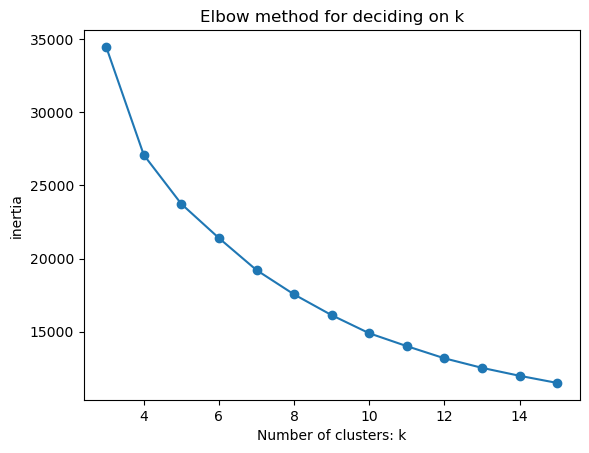

In [23]:
columns = ['f0_mean', 'f0_min', 'f0_max', 'zcr_mean']
clusters_range = [3,4,5,6,7,8,9,10,11,12,13,14,15]
find_elbow(df=voice_clip_meta_data, colnames=columns,clusters_range=clusters_range)